In [3]:
# Import usuels
import sympy as sp
sp.init_printing()

# Fonction utilisée pour afficher la valeur d'une expression sous la forme "nom = valeur"
def deq(name, value):
    return sp.Eq(sp.Symbol(name),value)

## Exercice 8.1

**La donnée a été changée, il faudrait adapter le notebook**

Jauge de contrainte (ancien 4.12.1)

In [4]:
#Pièce métallique

vS = 20e-4 # 20 cm^2
E = 210000  # Pour l'acier, 21'000 daN/mm^2
vNu = 0.3   # Coefficient de contraction (coefficient de Poisson)
vK = 2        # Coefficient de la jauge
vU0 = 10   # Tension d'alimentation du pont

2 Jauges sont utilisées, une soumise à la contrainte, et l'autre non.

### Q1

- Les jauges sont montées en série sur une des branches du pont.
- L'autre branche du pont est vers le système de mesure, si bien que les fils ont une résistance qui influence le résultat.

### Q2

Comment calculer la contrainte à partir de la tension mesurée sur le pont ?

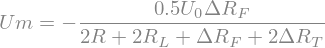

In [5]:
# Calcul de la tension 
U0, R, F, E, K, S, sigma, Um = sp.symbols("U0, R, F, E, K, S, sigma, Um ")
DRT=sp.Symbol("\Delta R_T")
DRF=sp.Symbol("\Delta R_F")
epsilon=sigma/E
# DRF=R*K*epsilon

U = U0*((R+DRT)/(2*R+2*DRT+DRF) - 1/2)
deq("Um", sp.factor(U))

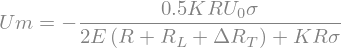

In [7]:
U=sp.simplify(U.subs(DRF, R*K*epsilon))
deq("Um",U)

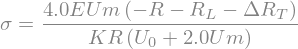

In [8]:
eSigma=sp.solve(sp.Eq(Um,U), sigma)
eSigma=eSigma[0]
deq("sigma", eSigma)



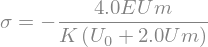

In [9]:
eSigma_simpl=eSigma.subs(RL,0).subs(DRT,0)
deq("sigma", eSigma_simpl)

## Comparaison entre compensation et non compensation

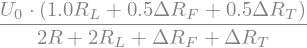

In [10]:
# Si on calcule la tension sans compensation de température
U2 = U0*((R+DRT+DRF+2*RL)/(2*R+2*RL+DRT+DRF) - 1/2)
U2.simplify()

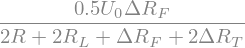

In [9]:
# Si on déporte la jauge inactive vers l'endroit de mesure
U = U0*((R+DRF+DRT+RL)/(2*R+2*RL+2*DRT+DRF) - 1/2)
U.simplify()

In [11]:
values={U0:vU0, R:vR, F:vF, E:vE, K:vK, S:vS}

NameError: name 'vR' is not defined